In [1]:
# after implementing new envelope misfit function,
# would like to check gradient consistency
# the testdata/testsrc setup could be used for that.

In [91]:
# what we need for preparation:
# - compute the gradient for the input source
# - have a vector of smaller and smaller steps
# - have a random update to the model
# - compute m0

# what we do then for each step in the step vector:
# - scale the random update by this step
# - compute the model of the input plus the update
# - get the misfit of that model output
# - get the relative error between this misfit and m0
# - record (step,relative error)

In [92]:
import os
import numpy as np
from obspy import read
from pandas import read_csv
import h5py
import matplotlib.pyplot as plt
mtype = 'square_envelope'

In [93]:
# compute the gradient for the input model
os.system('cp -R ../test/testdata/testsrc/wavefield_processed_archived/ \
          ../test/testdata/testsrc/wavefield_processed')
#os.system('cp ../test/testdata/testsrc/step_0/starting_model_basis_archived.h5 \
#          ../test/testdata/testsrc/step_0/starting_model.h5')
#os.system('cp ../test/testdata/testsrc/step_0/starting_model_basis_archived.h5 \
#          ../test/testdata/testsrc/step_0/base_model.h5')
os.mkdir('../test/testdata/testsrc/step_0/corr')
os.mkdir('../test/testdata/testsrc/step_0/adjt')
os.mkdir('../test/testdata/testsrc/step_0/kern')
os.mkdir('../test/testdata/testsrc/step_0/grad')
os.system('cp inputs/measr_config.json ../test/testdata/testsrc/')
os.system('cp inputs/source_config.json ../test/testdata/testsrc/')
os.system('cp inputs/config.json ../test/testdata/')

0

In [94]:
os.system('noisi correlation ../test/testdata/testsrc 0')
### remove output after finishing

0

In [95]:
os.system('noisi measurement ../test/testdata/testsrc 0')
m0 = read_csv('../test/testdata/testsrc/step_0/'+mtype+'.0.measurement.csv')['l2_norm'][0]
print(m0)

1296.22498076


In [96]:
os.system('noisi kernel ../test/testdata/testsrc 0')

0

In [66]:
#os.system('noisi gradient ../test/testdata/testsrc 0')

In [105]:
eps = np.arange(-4,2,0.2)

In [98]:
grad = np.load('../test/testdata/testsrc/step_0/kern/NET.STA1..CHA--NET.STA2..CHA.0.npy')

grad = grad[:,0,:] 
print(grad.shape)

(2025, 1800)


In [99]:
#direction = np.zeros(grad.shape)
#direction[:,0] = (np.random.random(grad[:,0].shape)-0.5)#(np.random.random((grad[:,0].shape))-0.5)
direction = (np.random.random(grad.shape)-0.5)#(np.random.random((grad[:,0].shape))-0.5)


In [100]:
#from noisi import BasisFunction
#b = BasisFunction('sine_taper',3601,3601)
# grad_expanded = np.zeros(grad.shape)
# direction_expanded = np.zeros(direction.shape)
# for i in range(2025):
#     grad_expanded[i,:] = b.expand(grad[i,:])
#     direction_expanded[i,:] = b.expand(direction[i,:])

# m_grad = np.sum(grad_expanded*direction_expanded)
m_grad = np.sum(direction*grad)
print(m_grad)

-16.8202321796


In [106]:

def get_misfit_from_direction(dvec):
    os.system('rm ../test/testdata/testsrc/step_0/starting_model.h5')
    
    os.system('cp ../test/testdata/testsrc/step_0/starting_model_basis_archived.h5 \
          ../test/testdata/testsrc/step_0/starting_model.h5')
    f = h5py.File('../test/testdata/testsrc/step_0/starting_model.h5','a')
    
    f['model'][:] += dvec
    f.close()

    
    os.system('rm ../test/testdata/testsrc/step_0/corr/\
NET.STA1..CHA--NET.STA2..CHA.sac')
    
    os.system('rm ../test/testdata/testsrc/step_0/'+
              mtype+'.0.measurement.csv')
    
    os.system('noisi correlation ../test/testdata/testsrc 0')
    

    os.system('noisi measurement ../test/testdata/testsrc 0')
    msr = read_csv('../test/testdata/testsrc/step_0/'+
                   mtype+'.0.measurement.csv')
    msr = msr['l2_norm'][0]
    
    return(msr)
    
    
    

-4.0
-17.061076519
0.0143187285885
-3.8
-18.1416237035
0.0785596482725
-3.6
-17.4522988881
0.0375777635962
-3.4
-17.0176388597
0.0117362636848
-3.2
-16.5583419395
0.0155699539302
-3.0
-16.7395722334
0.00479541217642
-2.8
-16.8501238976
0.00177712873829
-2.6
-16.8328288396
0.000748899294
-2.4
-16.7919324676
0.00168248046332
-2.2
-16.835910606
0.000932117118577
-2.0
-16.8127149605
0.000446915300778
-1.8
-16.8244562859
0.000251132458781
-1.6
-16.8289580189
0.000518770442141
-1.4
-16.8214600431
7.29992008991e-05
-1.2
-16.8200922821
8.31721538012e-06
-1.0
-16.8201344261
5.81166263933e-06
-0.8
-16.8225935148
0.000140386599689
-0.6
-16.8204447772
1.26393949038e-05
-0.4
-16.821066251
4.95873892312e-05
-0.2
-16.8211256772
5.31204069384e-05
3.5527136788e-15
-16.8227640205
0.000150523540782
0.2
-16.8268340131
0.000392493600995
0.4
-16.8369577437
0.000994371774676
0.6
-16.8621886799
0.00249440672375
0.8
-16.9256062985
0.0062647243986
1.0
-17.084885362
0.0157342169595
1.2
-17.4849705656
0.039520167

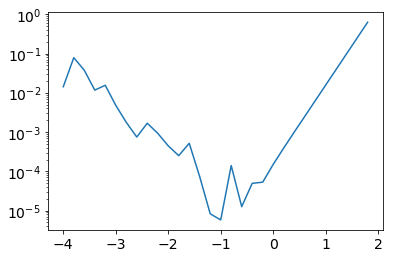

In [107]:
results = np.zeros(len(eps))
mf_a = np.zeros(len(eps))
plt.figure
for i in range(len(eps)):
    print(eps[i])
    val = 10**eps[i]
    msr1 = get_misfit_from_direction(val*direction)
    msr2 = get_misfit_from_direction(-val*direction)
    mf_approx = 1./(2.*val)*(msr1-msr2)
    print(mf_approx)
    results[i] = np.abs(m_grad-mf_approx)/np.abs(m_grad)
    mf_a[i] = mf_approx
    print(results[i])


plt.semilogy(eps,results)
plt.show()

In [108]:
# removing copied files...
os.system('rm -rf ../test/testdata/testsrc/wavefield_processed')
os.system('rm ../test/testdata/testsrc/step_0/starting_model.h5')
os.system('rm -rf ../test/testdata/testsrc/step_0/corr')
os.system('rm -rf ../test/testdata/testsrc/step_0/adjt')
os.system('rm -rf ../test/testdata/testsrc/step_0/kern')
os.system('rm -rf ../test/testdata/testsrc/step_0/grad')
os.system('rm ../test/testdata/testsrc/measr_config.json')
os.system('rm ../test/testdata/testsrc/source_config.json')
os.system('rm ../test/testdata/config.json')

0

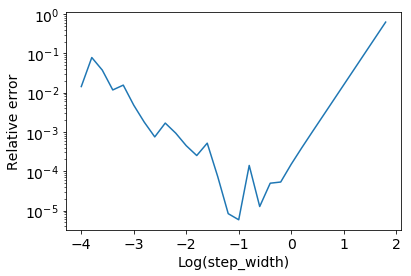

In [109]:
plt.semilogy(eps,results)
plt.xlabel('Log(step_width)')
plt.ylabel('Relative error')
plt.show()

In [26]:
23805.4/3.306



7200.6654567453115